In [1]:
import pandas as pd
import numpy as np

In [2]:
from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, \
    concatenate
from sklearn.metrics import f1_score, accuracy_score

Using TensorFlow backend.


In [92]:
df_train = pd.read_csv("heartbeat\mitbih_train.csv", header=None)

In [93]:
df_train = df_train.sample(frac=1)
df_test = pd.read_csv("heartbeat\mitbih_test.csv", header=None)

In [94]:
Y = np.array(df_train[187].values).astype(np.int8)
X = np.array(df_train[list(range(187))].values)[..., np.newaxis]

Y_test = np.array(df_test[187].values).astype(np.int8)
X_test = np.array(df_test[list(range(187))].values)[..., np.newaxis]

In [7]:
##################### PCA ###################################

In [8]:
from __future__ import print_function
import time

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [95]:
#feat=df_train[list(range(187))]
feat=df_test[list(range(187))]

In [96]:
feat.shape

(21892, 187)

In [100]:
df=feat
pca = PCA(n_components=10)
pca_result = pca.fit_transform(feat.values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
#df['y']=Y
df['y']=Y_test
df['label'] = df['y'].apply(lambda i: str(i))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.52674791 0.21832223 0.12449401 0.02131187 0.01105688 0.00752472
 0.00682504 0.00619586 0.00552778 0.00519008]


In [101]:
dx=df[['pca-one', 'pca-two', 'label']]
dx

,pca-one,pca-two,label
0,-2.976542,0.073606,0
1,0.748897,-1.408478,0
2,-1.919162,0.022115,0
3,-0.610499,-0.186309,0
4,1.068336,-0.667276,0
...,...,...,...
21887,7.656767,5.454956,4
21888,9.731510,4.291060,4
21889,0.035287,7.514775,4
21890,2.863385,6.769497,4


In [102]:
gk = dx.groupby('label') 

In [103]:
d0=gk.get_group('0')
d1=gk.get_group('1')
d2=gk.get_group('2')
d3=gk.get_group('3')
d4=gk.get_group('4')

# nmin=d3.shape[0]
# nmin
# d0=d0.sample(nmin)
# d1=d1.sample(nmin)
# d2=d2.sample(nmin)
# d4=d4.sample(nmin)
print(d0.shape[0])
print(d1.shape[0])
print(d2.shape[0])
print(d3.shape[0])
print(d4.shape[0])

18118
556
1448
162
1608


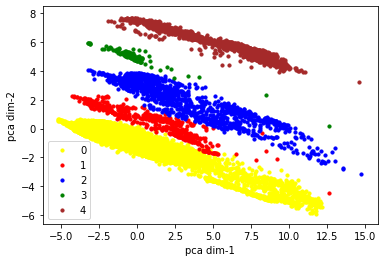

In [104]:
cdict = {'0': 'yellow', '1': 'red', '2': 'blue', '3': 'green', '4': 'brown'}
fig, ax = plt.subplots()
ax.scatter(d0['pca-one'], d0['pca-two'] , c = cdict['0'], label = '0', s = 10)
ax.scatter(d1['pca-one'], d1['pca-two'] , c = cdict['1'], label = '1', s = 10)
ax.scatter(d2['pca-one'], d2['pca-two'] , c = cdict['2'], label = '2', s = 10)
ax.scatter(d3['pca-one'], d3['pca-two'] , c = cdict['3'], label = '3', s = 10)
ax.scatter(d4['pca-one'], d4['pca-two'] , c = cdict['4'], label = '4', s = 10)
ax.legend()
ax.set_xlabel('pca dim-1')
ax.set_ylabel('pca dim-2')
plt.savefig('pca-mit_test.png')


In [80]:
############### PTB ################

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
df_1 = pd.read_csv("heartbeat\ptbdb_normal.csv", header=None)
df_2 = pd.read_csv("heartbeat\ptbdb_abnormal.csv", header=None)
df = pd.concat([df_1, df_2])

df_train, df_test = train_test_split(df, test_size=0.2, random_state=1337, stratify=df[187])


Y = np.array(df_train[187].values).astype(np.int8)
X = np.array(df_train[list(range(187))].values)[..., np.newaxis]

Y_test = np.array(df_test[187].values).astype(np.int8)
X_test = np.array(df_test[list(range(187))].values)[..., np.newaxis]

In [87]:
feat=df[list(range(187))]
Y = np.array(df[187].values).astype(np.int8)

In [89]:
df=feat
pca = PCA(n_components=3)
pca_result = pca.fit_transform(feat.values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
df['y']=Y
df['label'] = df['y'].apply(lambda i: str(i))
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


Explained variation per principal component: [0.47040814 0.15710095 0.08608538]


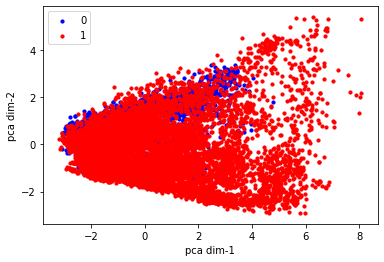

In [91]:
dx=df[['pca-one', 'pca-two', 'label']]
gk = dx.groupby('label') 
d0=gk.get_group('0')
d1=gk.get_group('1')

cdict = {'1': 'red', '0': 'blue'}
fig, ax = plt.subplots()
ax.scatter(d0['pca-one'], d0['pca-two'] , c = cdict['0'], label = '0', s = 10)
ax.scatter(d1['pca-one'], d1['pca-two'] , c = cdict['1'], label = '1', s = 10)

ax.legend()
ax.set_xlabel('pca dim-1')
ax.set_ylabel('pca dim-2')
#plt.show()
plt.savefig('pca-ptb.png')